# Clustering 1 - Sequential clustering

## Introduction

- Often important to find groups in data.
- Vastly important in data processing.

## Example

- Clustering in modern computer vision
- [**DINOv2: Learning Robust Visual Features without Supervision**](https://arxiv.org/pdf/2304.07193)

<p float="left">
    <img src="media/dino_cluster.png" width="600" />
</p>

## Clustering: Science or Art?

- [**Is there such a thing as a "correct" clustering?**](https://proceedings.mlr.press/v27/luxburg12a/luxburg12a.pdf)

<p float="left">
    <img src="media/thesis.png" width="200" />
    <img src="media/cluster_results.png" width="400" />
    <img src="media/explanation.png" width="400" />
</p>

### Key points

- Often no prior knowledge about data -> unsupervised
- Different ways of specifying groups / clusters -> different answers.

### Loose idea of clustering

- Find natural groups such that:
    - Points in the same cluster "similar".
    - Points in different clusters are "dissimilar".
- Draw example:

### Different types of clustering

- Will look at:
    - Sequential
    - Hierarchical
    - Function optimization
        - K-means
        - Spectral
    - Clustering evaluation

## Membership functions

- Let $$X = \{\mathbf{x_1}, \cdots, \mathbf{x_N}\}$$
- Task: Assign cluster memberships to $\mathbf{x}_i$ for $i=1,\cdots,N$.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)
centers = np.array([[0.0, 0.0],
                    [5.0, 0.0],
                    [2.5, 4.0]])
points_per_cluster = 4

X = []
labels = []
for k, c in enumerate(centers):
    pts = c + 0.3 * rng.normal(size=(points_per_cluster, 2))
    X.append(pts)
    labels += [k] * points_per_cluster

X = np.vstack(X)
labels = np.array(labels)

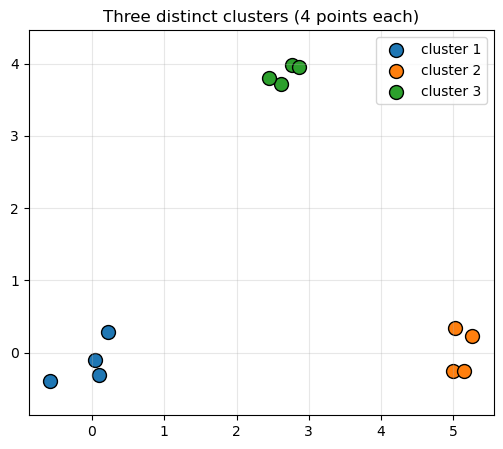

In [4]:
plt.figure(figsize=(6, 5))
for k in range(3):
    ix = labels == k
    plt.scatter(X[ix, 0], X[ix, 1], s=100, label=f'cluster {k+1}', edgecolor='k')
plt.title('Three distinct clusters (4 points each)')
plt.legend()
plt.axis('equal')
plt.grid(alpha=0.3)
plt.show()

### Membership functions

- Assume $m$ clusters.
- Let $u_j: \mathbf{x} \rightarrow \{0, 1\}$.
- Subject to: $\sum_{j=1}^{^m} u_j (\mathbf{x}_i)=1$ for $i=1,\cdots,N$



### Note on idea 3

- $\boldsymbol{\Pi}$ is an eigenvector of $\mathbf{H}^T$ for $\lambda = 1$
- World's most famous eigenvector
- Google PageRank alogirthm (with some modifications)
- Solution: $$ \boldsymbol{\Pi} = \begin{bmatrix} 0.4 \\ 0.1 \\ 0.3 \\ 0.2 \end{bmatrix}$$
- Alternatively: 

## Google as a Markov chain

- $\mathbf{H}$ is special!
    - Transition matrix in (homogeneous, discrete) Markov chain
- $$ \mathbf{H} = \begin{bmatrix} 0 & \frac{1}{3} & \frac{1}{3} & \frac{1}{3} \\ 0 & 0 & \frac{1}{2} & \frac{1}{2} \\ 1 & 0 & 0 & 0 \\ \frac{1}{2} & 0 & \frac{1}{2} & 0 \end{bmatrix}$$

### Google as a Markov chain

- $\boldsymbol{\Pi}$ has a special meaning
- Theorem: If $\mathbf{H}: H_{ij}=p_{ij}$ is a transition matrix and $0 \lt p_{ij} \lt 1$ then
    - $\lambda_{max}=1$
    - $\boldsymbol{\Pi}_{max}$ is unique, positive, sums to one.
    - $\boldsymbol{\Pi}_{max}$ can always be found by the power method!

### Markov chain example

- $$ \mathbf{A}(\mathbf{H}^T) = \begin{bmatrix} 0.3 & 0.4 & 0.5 \\ 0.3 & 0.4 & 0.3 \\ 0.4 & 0.2 & 0.2 \end{bmatrix}$$

### Markov chain example

- Find:
    - P(start @ C, end @ B after 2 deliveries)
- $P(CA)P(AB)+P(CB)P(BB)+P(CC)P(CB)=0.33$
- $$ \begin{bmatrix} 0.41 & 0.38 & 0.37 \\ 0.33 & 0.34 & 0.33 \\ 0.26 & 0.28 & 0.30 \end{bmatrix} = \mathbf{A}\mathbf{A}=\mathbf{A}^2$$


### Markov chain example

- Probablities after 5 and 6 steps:
- $$ \mathbf{A}^5 \approx \mathbf{A}^6 \approx \begin{bmatrix} 0.39 & 0.39 & 0.39 \\ 0.33 & 0.33 & 0.33 \\ 0.28 & 0.28 & 0.28 \end{bmatrix} $$
- Converges!
- Stationary distribution.


### Markov chain example

- Eigenvector:
    - Let $\mathbf{x}^{(0)}$ be our starting rank.
- Update rank for each step in the chain.
- Show ->


### The power method

- Iterative; finds dominant eigenvector
- Scaling after iteration in general.
- Markov example:
    - $\mathbf{x}^T = [0.39, 0.33, 0.28]$ is the stationary distribution off the states in the chain.

### Idea 4

- Modify $\mathbf{H}$ such that $0 \lt p_{ij} \lt 1$.
- Modification 1; Dangling nodes (no outlinks) creates zero rows in $\mathbf{H}$
- $$ \mathbf{H}^T = \begin{bmatrix} 0 & \frac{1}{4} & \frac{1}{4} & \frac{1}{4} & \frac{1}{4} \\ 0 & 0 & \frac{1}{2} & \frac{1}{2} & 0 \\ 1 & 0 & 0 & 0 & 0 \\ \frac{1}{2} & 0 & \frac{1}{2} & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 \end{bmatrix}$$
- Replace zero row with row of 1/n probablities.

### Modification 2

- Google matrix: $$ \mathbf{G} = \alpha \mathbf{S} + (1-\alpha)\mathbf{E}$$

### Interpretation $(\alpha=0.85)$

- 85% of the time, surfer follow links.
- 15% of the time, surfer types URL (teleportation).
- Personalization:
    - $\frac{1}{n}\mathbf{e}\mathbf{e}^T \rightarrow \mathbf{e}\mathbf{v}^T$


### Final remarks

- $\mathbf{H}$ is sparse (good).
- $\mathbf{G}$ is dense but function of $\mathbf{H}$
- Power method is nice! (no inverse)
- Early report from Google indicated 50 iterations.
- Updated on a frequent basis.

## Programming exercises

No programming exercises for this lecture
